In [5]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/80/6f/57d36f6507e432d7fc1956b2e9e8530c5c2d2bfcd8821bcbfae271cd6688/tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Obtaining dependency information for tensorflow-intel==2.14.0 from https://files.pythonhosted.org/packages/ad/6e/1bfe367855dd87467564f7bf9fa14f3b17889988e79598bc37bf18f5ffb6/tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata (4.8 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached absl_py-2.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26

In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [8]:
data = pd.read_csv('Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [10]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [12]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [13]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [14]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [15]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [16]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 8s - loss: 0.0342 - 8s/epoch - 217ms/step
Epoch 2/20
35/35 - 3s - loss: 0.0115 - 3s/epoch - 100ms/step
Epoch 3/20
35/35 - 3s - loss: 0.0100 - 3s/epoch - 95ms/step
Epoch 4/20
35/35 - 3s - loss: 0.0286 - 3s/epoch - 90ms/step
Epoch 5/20
35/35 - 3s - loss: 0.0082 - 3s/epoch - 88ms/step
Epoch 6/20
35/35 - 3s - loss: 0.0076 - 3s/epoch - 89ms/step
Epoch 7/20
35/35 - 3s - loss: 0.0068 - 3s/epoch - 88ms/step
Epoch 8/20
35/35 - 3s - loss: 0.0068 - 3s/epoch - 88ms/step
Epoch 9/20
35/35 - 3s - loss: 0.0069 - 3s/epoch - 86ms/step
Epoch 10/20
35/35 - 3s - loss: 0.0068 - 3s/epoch - 96ms/step
Epoch 11/20
35/35 - 4s - loss: 0.0064 - 4s/epoch - 102ms/step
Epoch 12/20
35/35 - 3s - loss: 0.0064 - 3s/epoch - 100ms/step
Epoch 13/20
35/35 - 4s - loss: 0.0062 - 4s/epoch - 100ms/step
Epoch 14/20
35/35 - 4s - loss: 0.0056 - 4s/epoch - 102ms/step
Epoch 15/20
35/35 - 4s - loss: 0.0075 - 4s/epoch - 100ms/step
Epoch 16/20
35/35 - 3s - loss: 0.0055 - 3s/epoch - 99ms/step
Epoch 17/20
35/35 - 4s - l

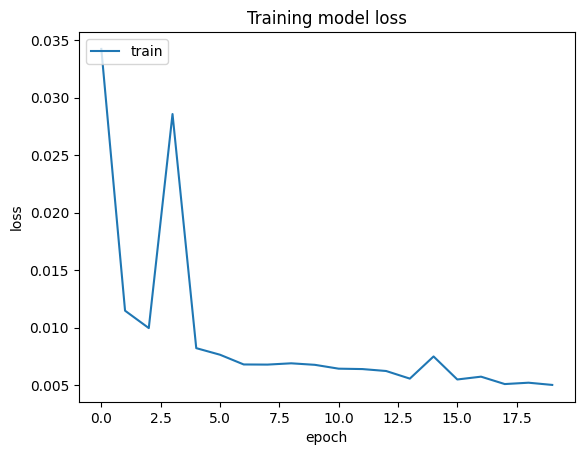

In [17]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [18]:
testData = pd.read_csv('Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [19]:
y_pred = model.predict(X_test)
y_pred

6/6 [==============================] - 1s 25ms/step


array([[1.2746627],
       [1.2748177],
       [1.2818172],
       [1.2948419],
       [1.3088324],
       [1.3162742],
       [1.3143888],
       [1.3055949],
       [1.2964003],
       [1.2901433],
       [1.282028 ],
       [1.271106 ],
       [1.2600515],
       [1.2491679],
       [1.2425842],
       [1.2412626],
       [1.2502043],
       [1.2693708],
       [1.2958565],
       [1.3264687],
       [1.3489513],
       [1.3603469],
       [1.3570617],
       [1.3416002],
       [1.3207794],
       [1.3019357],
       [1.2887027],
       [1.2791588],
       [1.2682338],
       [1.2561624],
       [1.2436447],
       [1.2302017],
       [1.2126122],
       [1.1909256],
       [1.176204 ],
       [1.1743052],
       [1.1842325],
       [1.2017013],
       [1.2232134],
       [1.2410388],
       [1.2587458],
       [1.277329 ],
       [1.2969232],
       [1.3157213],
       [1.3310363],
       [1.3394341],
       [1.3385042],
       [1.3338878],
       [1.3300397],
       [1.3300965],


In [20]:
predicted_price = sc.inverse_transform(y_pred)

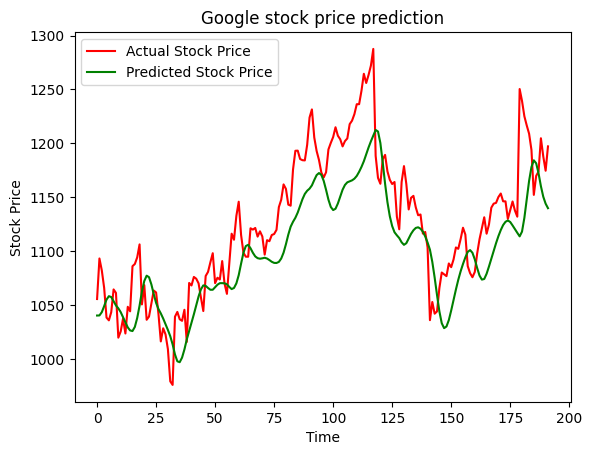

In [21]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()